In [263]:
import json
import spacy
import string
import random
import numpy as np
import pickle as pkl
from tqdm import tqdm_notebook as tqdm
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from classifier_utils import ClassifierUtils
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import importlib
import sklearn
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
nlp = spacy.load('en')
nlp_light = spacy.load('en', disable=['parser', 'tagger', 'ner'])
stop_words = spacy.lang.en.stop_words.STOP_WORDS
alphabet = string.ascii_lowercase
clf_utils = ClassifierUtils()

In [4]:
with open('../data/review_decisions.json') as f:
    data = json.load(f)

## Group by Revision

In [5]:
data_by_revision = dict()
for doc_id in data:
    if('revisions') in data[doc_id]:
        for revision in data[doc_id]['revisions']:
            if(revision not in data_by_revision):
                data_by_revision[revision] = dict()
            if('reviews' in data[doc_id]['revisions'][revision]):
                for review in data[doc_id]['revisions'][revision]['reviews']:
                    review_obj = data[doc_id]['revisions'][revision]['reviews'][review]
                    if('text' in review_obj and 'decision' in review_obj):
                        if(len(review_obj['text'].strip()) > 0 and len(review_obj['decision']) > 0):
                            if(review_obj['decision'] not in data_by_revision[revision]):
                                data_by_revision[revision][review_obj['decision']] = list()
                            data_by_revision[revision][review_obj['decision']].append(review_obj['text'])

In [139]:
documents = data_by_revision['0']['Reject'] + data_by_revision['0']['Accept'] + data_by_revision['0']['Major Revision'] + data_by_revision['0']['Minor Revision']
labels = [0]*len(data_by_revision['0']['Reject']) + [1]*len(data_by_revision['0']['Accept']) + [2]*len(data_by_revision['0']['Major Revision']) + [3]*len(data_by_revision['0']['Minor Revision'])

In [7]:
token_counts = dict()
doc_counts = dict()
all_token_counts = Counter()
all_doc_counts = Counter()


token_counts[0] = Counter()
token_counts[1] = Counter()
token_counts[2] = Counter()
token_counts[3] = Counter()
doc_counts[0] = Counter()
doc_counts[1] = Counter()
doc_counts[2] = Counter()
doc_counts[3] = Counter()


for idx, document in enumerate(tqdm(documents)):
    tokenized_doc = [token.text for token in nlp_light(document.lower())]
    current_counter = Counter()
    for token in tokenized_doc:
        token_counts[labels[idx]][token] += 1
        all_token_counts[token] += 1
        if(not current_counter[token]):
            doc_counts[labels[idx]][token] += 1
            all_doc_counts[token] += 1
        current_counter[token] += 1

## Naive Bayes Classification

In [ ]:
all_metrics_nb = list()
for _ in range(10):
    metrics = clf_utils.cross_validate(documents, labels)
    all_metrics_nb.append(metrics)

In [ ]:
print("Reject")
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['0']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['0']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['0']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Accept")
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['1']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['1']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['1']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Major Revision")
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['2']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['2']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['2']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Minor Revision")
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['3']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['3']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_nb[idx2][idx]['3']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))

In [ ]:
ordered_features = clf_utils.get_nb_features(documents, labels)

In [ ]:
for feature in ordered_features[0][:20]:
    print(feature)

In [ ]:
for feature in ordered_features[1][:20]:
    print(feature)

In [ ]:
for feature in ordered_features[2][:20]:
    print(feature)

In [ ]:
for feature in ordered_features[3][:20]:
    print(feature)

## Logistic Regression

In [ ]:
all_metrics_lr_ovr = list()
for _ in range(10):
    metrics = clf_utils.cross_validate(documents, labels, clf_type='LR')
    all_metrics_lr_ovr.append(metrics)

In [ ]:
print("Reject")
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['0']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['0']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['0']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Accept")
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['1']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['1']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['1']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Major Revision")
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['2']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['2']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['2']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Minor Revision")
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['3']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['3']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_ovr[idx2][idx]['3']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))

In [ ]:
"""
These are features from One vs Rest
"""
ordered_features = clf_utils.get_lr_features(documents, labels, multi_class='ovr')

In [ ]:
for feature in ordered_features[0][:20]:
    print(feature)

In [ ]:
for feature in ordered_features[1][:20]:
    print(feature)

In [ ]:
for feature in ordered_features[2][:20]:
    print(feature)

In [ ]:
for feature in ordered_features[3][:20]:
    print(feature)

In [ ]:
all_metrics_lr_mn = list()
for _ in range(10):
    metrics = clf_utils.cross_validate(documents, labels, clf_type='LR', multi_class='multinomial')
    all_metrics_lr_mn.append(metrics)

In [ ]:
print("Reject")
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['0']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['0']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['0']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Accept")
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['1']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['1']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['1']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Major Revision")
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['2']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['2']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['2']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Minor Revision")
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['3']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['3']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics_lr_mn[idx2][idx]['3']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))

In [ ]:
"""
These are features from Multinomial Logistic Regression
"""
ordered_features = clf_utils.get_lr_features(documents, labels, multi_class='multinomial')

In [ ]:
for feature in ordered_features[0][:20]:
    print(feature)

In [ ]:
for feature in ordered_features[1][:20]:
    print(feature)

In [ ]:
for feature in ordered_features[2][:20]:
    print(feature)

In [ ]:
for feature in ordered_features[3][:20]:
    print(feature)

## Generating WordClouds

In [ ]:
wordcloud = dict()
wordcloud['Reject'] = WordCloud().generate(' '.join(data_by_revision['0']['Reject']))
wordcloud['Accept'] = WordCloud().generate(' '.join(data_by_revision['0']['Accept']))
wordcloud['Major Revision'] = WordCloud().generate(' '.join(data_by_revision['0']['Major Revision']))
wordcloud['Minor Revision'] = WordCloud().generate(' '.join(data_by_revision['0']['Minor Revision']))

In [ ]:
plt.imshow(wordcloud['Reject'], interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(wordcloud['Accept'], interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(wordcloud['Major Revision'], interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(wordcloud['Minor Revision'], interpolation='bilinear')
plt.axis('off')
plt.show()

## Univariate Correlation

In [ ]:
count_vectorizer = CountVectorizer(tokenizer=clf_utils.tokenizer)
count_vectorizer.fit(documents)

In [ ]:
document_features = count_vectorizer.transform(documents).toarray()

In [ ]:
boolean_reject = np.array(labels) == np.array([0]*len(labels))
int_reject = np.array([int(value) for value in boolean_reject])
boolean_accept = np.array(labels) == np.array([1]*len(labels))
int_accept = np.array([int(value) for value in boolean_accept])
boolean_major = np.array(labels) == np.array([2]*len(labels))
int_major = np.array([int(value) for value in boolean_major])
boolean_minor = np.array(labels) == np.array([3]*len(labels))
int_minor = np.array([int(value) for value in boolean_minor])

In [ ]:
document_features.shape

In [ ]:
feature_names = count_vectorizer.get_feature_names()
correlations_reject = [np.corrcoef(document_features[:,idx], int_reject)[0][1] for idx in range(len(feature_names))]
correlations_accept = [np.corrcoef(document_features[:,idx], int_accept)[0][1] for idx in range(len(feature_names))]
correlations_major = [np.corrcoef(document_features[:,idx], int_major)[0][1] for idx in range(len(feature_names))]
correlations_minor = [np.corrcoef(document_features[:,idx], int_minor)[0][1] for idx in range(len(feature_names))]

In [ ]:
sorted_feature_names_reject = [feature_names[idx] for idx in np.argsort(correlations_reject)][::-1]
sorted_feature_names_accept = [feature_names[idx] for idx in np.argsort(correlations_accept)][::-1]
sorted_feature_names_major = [feature_names[idx] for idx in np.argsort(correlations_major)][::-1]
sorted_feature_names_minor = [feature_names[idx] for idx in np.argsort(correlations_minor)][::-1]
sorted_correlations_reject = np.sort(correlations_reject)[::-1]
sorted_correlations_accept = np.sort(correlations_accept)[::-1]
sorted_correlations_major = np.sort(correlations_major)[::-1]
sorted_correlations_minor = np.sort(correlations_minor)[::-1]

In [ ]:
for idx, feature in enumerate(sorted_feature_names_reject[:20]):
    print(feature, sorted_correlations_reject[idx])

In [ ]:
for idx, feature in enumerate(sorted_feature_names_accept[:20]):
    print(feature, sorted_correlations_accept[idx])

In [ ]:
for idx, feature in enumerate(sorted_feature_names_major[:20]):
    print(feature, sorted_correlations_major[idx])

In [ ]:
for idx, feature in enumerate(sorted_feature_names_minor[:20]):
    print(feature, sorted_correlations_minor[idx])

## Sanity Check

In [ ]:
marked_ids = list()
for idx, document in tqdm(enumerate(documents)):
    flag = 0
    for token in nlp_light(document):
        if(token.text == 'co2-sensing'):
            flag = 1
            break
    if(flag == 1):
        marked_ids.append(idx)

In [ ]:
marked_ids

In [ ]:
counter = Counter()
for idx in marked_ids:
    for token in nlp_light(documents[idx]):
        if(token.text == 'co2-sensing'):
            counter[idx] += 1

In [ ]:
counter

In [ ]:
labels[3638]

In [ ]:
sum(boolean_accept)

In [ ]:
sum(int_accept)

In [ ]:
max(correlations_accept)

## Sampling Reviews

In [ ]:
selected_decisions = list()
selected_reviews = list()

In [ ]:
decisions = ['Reject', 'Accept', 'Minor Revision', 'Major Revision']
decision = random.choice(decisions)
selected_decisions.append(decision)
review = np.random.choice(data_by_revision['0'][decision])
selected_reviews.append(review)

In [ ]:
review

In [ ]:
ind=9
print(selected_decisions[ind])
selected_reviews[ind]

In [ ]:
selected_decisions[10:]

## Better Feature Selection

In [6]:
all_metrics = dict()
all_metrics['NB'] = dict()
all_metrics['LR'] = dict()
all_metrics['RF'] = dict()

In [10]:
all_metrics['NB']['WC_FT'] = list()
for _ in range(10):
    metrics = clf_utils.cross_validate(documents, labels, clf_type='NB', features='count', 
                                      normalize=False, binary=True)
    all_metrics['NB']['WC_FT'].append(metrics)




  0%|          | 0/5 [00:00<?, ?it/s]/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 20%|██        | 1/5 [01:17<05:11, 77.93s/it]/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 40%|████      | 2/5 [02:49<04:05, 82.00s/it]/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 60%|██████    | 3/5 [04:44<03:03, 91.87s/it]/Users/sohamp/miniconda3/lib/python3

 20%|██        | 1/5 [02:16<09:05, 136.48s/it]/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 40%|████      | 2/5 [04:32<06:49, 136.46s/it]/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 60%|██████    | 3/5 [06:53<04:35, 137.78s/it]/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 80%|████████  | 4/5 [09:09<02:17, 137.08s/it]/Users/sohamp/miniconda3/li

In [12]:
print("Reject")
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['0']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['0']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['0']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Accept")
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['1']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['1']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['1']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Major Revision")
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['2']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['2']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['2']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))
print("Minor Revision")
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['3']['precision'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['3']['recall'] for idx in range(5)]) for idx2 in range(10)]))
print(np.mean([np.mean([all_metrics['NB']['WC_FT'][idx2][idx]['3']['f1-score'] for idx in range(5)]) for idx2 in range(10)]))

Reject
0.6874210013650731
0.07651122686875268
0.13738767336372046
Accept
0.02
0.00010050251256281409
0.0002
Major Revision
0.4785800568513249
0.8919340120056726
0.6228274627078252
Minor Revision
0.5408129167252642
0.36798823555132204
0.4376968745521669


## Random Forest

In [29]:
metrics = clf_utils.cross_validate(documents, labels, clf_type='RF', features='count', 
                                  normalize=False, binary=False, n_estimators=100, max_depth=2)

/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sohamp/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

In [140]:
vectorizer = CountVectorizer(tokenizer=clf_utils.tokenizer)
vectorizer.fit(documents, labels)
x_train = vectorizer.transform(documents)

In [49]:
import warnings
warnings.filterwarnings('ignore')
n_estimators = [5,10,20,50,100,200,500,1000]
max_depth = [2,4,8,16,32,64,128,256,512]
all_metrics = dict()
for n_estimator in tqdm(n_estimators):
    all_metrics[n_estimator] = dict()
    for depth in max_depth:
        clf = RandomForestClassifier(n_estimators=n_estimator, max_depth=depth)
        clf.fit(x_train, labels)
        y_predicted = clf.predict(x_train)
        metrics = classification_report(labels, y_predicted, output_dict=True)
        metrics['accuracy'] = accuracy_score(labels, y_predicted)
        all_metrics[n_estimator][depth] = metrics

In [159]:
clf = RandomForestClassifier(n_estimators=50, max_depth=128)
clf.fit(x_train, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=128, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [179]:
import csv
n_estimators = 50
max_depth = 16
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
clf.fit(x_train, labels)
feature_names = vectorizer.get_feature_names()
feature_importances = clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
important_features = list()
for idx in sorted_indices:
    if(feature_importances[idx] > 0):
        important_features.append(feature_names[idx])
with open('../outputs/words_rf_' + str(n_estimators) + '_' + str(max_depth)+'.csv', 'w') as f:
    writer = csv.writer(f)
    for feature in important_features:
        if(feature not in STOP_WORDS):
            writer.writerow([feature, all_token_counts[feature], all_doc_counts[feature]])

In [163]:
from sklearn import tree
tree.export_graphviz(clf.estimators_[0], out_file=open('../outputs/dt_1.dot', 'w'), feature_names= feature_names)

In [213]:
"""
Using the results from grid search
"""
with open('../outputs/rf_metrics.json') as f:
    all_metrics = json.load(f)

In [246]:
print(np.mean([metric['macro avg']['f1-score'] for metric in all_metrics['50']['128']]))
print(np.mean([metric['weighted avg']['f1-score'] for metric in all_metrics['50']['128']]))

0.3680545365837379
0.4402083732262117


In [214]:
summary_metrics = dict()
for n_estimators in all_metrics:
    summary_metrics[n_estimators] = dict()
    for depth in all_metrics[n_estimators]:
        summary_metrics[n_estimators][depth] = dict()
        summary_metrics[n_estimators][depth]['0'] = dict()
        summary_metrics[n_estimators][depth]['1'] = dict()
        summary_metrics[n_estimators][depth]['2'] = dict()
        summary_metrics[n_estimators][depth]['3'] = dict()
        summary_metrics[n_estimators][depth]['accuracy'] = np.mean([x['accuracy'] 
                                                                    for x in all_metrics[n_estimators][depth]])
        for label in ['0', '1', '2', '3']:
            summary_metrics[n_estimators][depth][label]['precision'] = np.mean([x[label]['precision']
                                                                             for x in all_metrics[n_estimators][depth]])
            summary_metrics[n_estimators][depth][label]['f1-score'] = np.mean([x[label]['f1-score']
                                                                             for x in all_metrics[n_estimators][depth]])
            summary_metrics[n_estimators][depth][label]['recall'] = np.mean([x[label]['recall']
                                                                         for x in all_metrics[n_estimators][depth]])
            
            summary_metrics[n_estimators][depth]['accuracy'] = np.mean([x['accuracy']
                                                                       for x in all_metrics[n_estimators][depth]])

In [218]:
summary_metrics['50']['128']['2']

{'precision': 0.5038400749120898,
 'f1-score': 0.6166895864010865,
 'recall': 0.7948500447344624}

In [114]:
plots = dict()
n_estimators = ['5','10','20','50']
labels = ['0', '1', '2', '3']
for x in n_estimators:
    plots[x] = dict()
    for label in labels:
        plots[x][label] = dict()
        plots[x][label]['precision'] = [summary_metrics[x][z][label]['precision'] for z in summary_metrics[x]]
        plots[x][label]['f1-score'] = [summary_metrics[x][z][label]['f1-score'] for z in summary_metrics[x]]
        plots[x][label]['recall'] = [summary_metrics[x][z][label]['recall'] for z in summary_metrics[x]]
    plots[x]['accuracy'] = [summary_metrics[x][z]['accuracy'] for z in summary_metrics[x]]

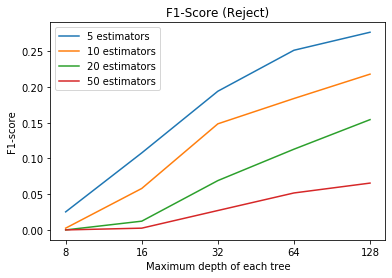

In [180]:
x_axis = ['8','16','32','64','128']
line1 = plt.plot(x_axis, plots['5']['0']['f1-score'], label='5 estimators')
line2 = plt.plot(x_axis, plots['10']['0']['f1-score'], label='10 estimators')
line3 = plt.plot(x_axis, plots['20']['0']['f1-score'], label='20 estimators')
line4 = plt.plot(x_axis, plots['50']['0']['f1-score'], label='50 estimators')
plt.title("F1-Score (Reject)")
plt.xlabel("Maximum depth of each tree")
plt.ylabel("F1-score")
plt.legend(loc='upper left')

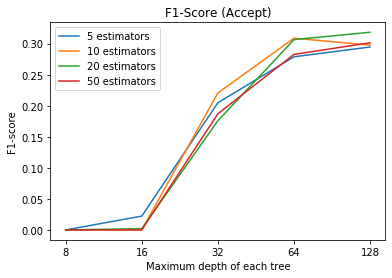

In [118]:
x_axis = ['8','16','32','64','128']
line1 = plt.plot(x_axis, plots['5']['1']['f1-score'], label='5 estimators')
line2 = plt.plot(x_axis, plots['10']['1']['f1-score'], label='10 estimators')
line3 = plt.plot(x_axis, plots['20']['1']['f1-score'], label='20 estimators')
line4 = plt.plot(x_axis, plots['50']['1']['f1-score'], label='50 estimators')
plt.title("F1-Score (Accept)")
plt.xlabel("Maximum depth of each tree")
plt.ylabel("F1-score")
plt.legend(loc='upper left')

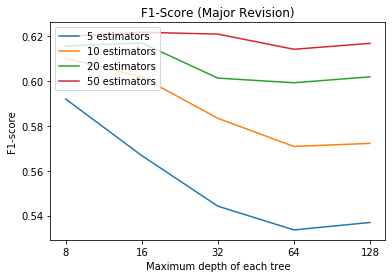

In [119]:
x_axis = ['8','16','32','64','128']
line1 = plt.plot(x_axis, plots['5']['2']['f1-score'], label='5 estimators')
line2 = plt.plot(x_axis, plots['10']['2']['f1-score'], label='10 estimators')
line3 = plt.plot(x_axis, plots['20']['2']['f1-score'], label='20 estimators')
line4 = plt.plot(x_axis, plots['50']['2']['f1-score'], label='50 estimators')
plt.title("F1-Score (Major Revision)")
plt.xlabel("Maximum depth of each tree")
plt.ylabel("F1-score")
plt.legend(loc='upper left')

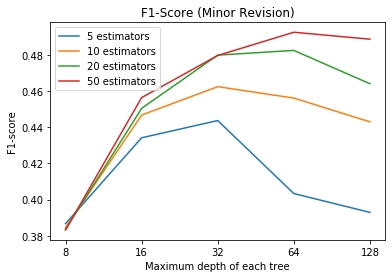

In [120]:
x_axis = ['8','16','32','64','128']
line1 = plt.plot(x_axis, plots['5']['3']['f1-score'], label='5 estimators')
line2 = plt.plot(x_axis, plots['10']['3']['f1-score'], label='10 estimators')
line3 = plt.plot(x_axis, plots['20']['3']['f1-score'], label='20 estimators')
line4 = plt.plot(x_axis, plots['50']['3']['f1-score'], label='50 estimators')
plt.title("F1-Score (Minor Revision)")
plt.xlabel("Maximum depth of each tree")
plt.ylabel("F1-score")
plt.legend(loc='upper left')

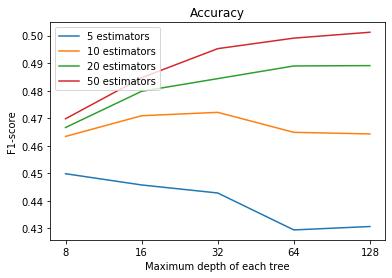

In [121]:
x_axis = ['8','16','32','64','128']
line1 = plt.plot(x_axis, plots['5']['accuracy'], label='5 estimators')
line2 = plt.plot(x_axis, plots['10']['accuracy'], label='10 estimators')
line3 = plt.plot(x_axis, plots['20']['accuracy'], label='20 estimators')
line4 = plt.plot(x_axis, plots['50']['accuracy'], label='50 estimators')
plt.title("Accuracy")
plt.xlabel("Maximum depth of each tree")
plt.ylabel("F1-score")
plt.legend(loc='upper left')

In [257]:
with open('../outputs/large_forests2.json') as f:
    lf_metrics = json.load(f)

In [261]:
lf_metrics['1000']['256']

[{'0': {'precision': 0.6666666666666666,
   'recall': 0.003076923076923077,
   'f1-score': 0.006125574272588055,
   'support': 650},
  '1': {'precision': 0.7123287671232876,
   'recall': 0.25870646766169153,
   'f1-score': 0.3795620437956204,
   'support': 201},
  '2': {'precision': 0.515681233933162,
   'recall': 0.7966640190627482,
   'f1-score': 0.6260923845193509,
   'support': 1259},
  '3': {'precision': 0.4892018779342723,
   'recall': 0.5338114754098361,
   'f1-score': 0.5105340519353259,
   'support': 976},
  'micro avg': {'precision': 0.5113415424497731,
   'recall': 0.5113415424497731,
   'f1-score': 0.5113415424497731,
   'support': 3086},
  'macro avg': {'precision': 0.5959696364143472,
   'recall': 0.3980647213027997,
   'f1-score': 0.3805785136307213,
   'support': 3086},
  'weighted avg': {'precision': 0.5519167601784882,
   'recall': 0.5113415424497731,
   'f1-score': 0.4429051007384455,
   'support': 3086},
  'accuracy': 0.5113415424497731},
 {'0': {'precision': 1.0,
 

## Disagreement

In [175]:
num_decisions = 0
num_combined_decisions = 0
num_bad_reviews = 0
num_good_reviews = 0
agreements = dict()
for doc_id in data:
    if('revisions' in data[doc_id]):
        if('0' in data[doc_id]['revisions']):
            if('combined_decision' in data[doc_id]['revisions']['0']):
                combined_decision = data[doc_id]['revisions']['0']['combined_decision']
                if(combined_decision not in agreements):
                    agreements[combined_decision] = Counter()
                num_combined_decisions += 1
                if('reviews' in data[doc_id]['revisions']['0']):
                    for review in data[doc_id]['revisions']['0']['reviews']:
                        if('decision' in data[doc_id]['revisions']['0']['reviews'][review]):
                            decision = data[doc_id]['revisions']['0']['reviews'][review]['decision']
                            if(decision):
                                agreements[combined_decision][decision] += 1
                                if(decision == combined_decision):
                                    num_good_reviews += 1
                                else:
                                    num_bad_reviews += 1
                                num_decisions += 1

## Extra Features Results

In [188]:
classes = ['0','1','2','3']

In [219]:
with open('../outputs/lr_metrics.json') as f:
    lr_metrics = json.load(f)

In [224]:
summarized_metrics = dict()
for config in lr_metrics:
    summarized_metrics[config] = dict()
    for label in classes:
        summarized_metrics[config][label] = dict()
        summarized_metrics[config][label]['f1-score'] = np.mean([metric[label]['f1-score'] for metric in lr_metrics[config]])
        summarized_metrics[config][label]['precision'] = np.mean([metric[label]['precision'] for metric in lr_metrics[config]])
        summarized_metrics[config][label]['recall'] = np.mean([metric[label]['recall'] for metric in lr_metrics[config]])
    summarized_metrics[config]['accuracy'] = np.mean([metric['accuracy'] for metric in lr_metrics[config]])
    summarized_metrics[config]['macro'] = np.mean([metric['macro avg']['f1-score'] for metric in lr_metrics[config]])
    summarized_metrics[config]['weighted'] = np.mean([metric['weighted avg']['f1-score'] for metric in lr_metrics[config]])

In [231]:
print(summarized_metrics['4']['macro'])
print(summarized_metrics['4']['weighted'])

0.15268673725760548
0.24592474342177803


In [236]:
with open('../outputs/lr_multi_metrics.json') as f:
    lr_metrics = json.load(f)

In [237]:
summarized_metrics = dict()
for config in lr_metrics:
    summarized_metrics[config] = dict()
    for label in classes:
        summarized_metrics[config][label] = dict()
        summarized_metrics[config][label]['f1-score'] = np.mean([metric[label]['f1-score'] for metric in lr_metrics[config]])
        summarized_metrics[config][label]['precision'] = np.mean([metric[label]['precision'] for metric in lr_metrics[config]])
        summarized_metrics[config][label]['recall'] = np.mean([metric[label]['recall'] for metric in lr_metrics[config]])
    summarized_metrics[config]['accuracy'] = np.mean([metric['accuracy'] for metric in lr_metrics[config]])
    summarized_metrics[config]['macro'] = np.mean([metric['macro avg']['f1-score'] for metric in lr_metrics[config]])
    summarized_metrics[config]['weighted'] = np.mean([metric['weighted avg']['f1-score'] for metric in lr_metrics[config]])

In [241]:
print(summarized_metrics['4']['macro'])
print(summarized_metrics['4']['weighted'])

0.17299004472383747
0.2723933141734927


## Class Balancing

In [264]:
with open('../outputs/rf_ros_rus_metrics.pkl', 'rb') as f:
    metrics = pkl.load(f)

In [267]:
ros_metrics = dict()
rus_metrics = dict()

In [279]:
ros_metrics['accuracy'] = np.mean([metric['accuracy'] for metric in metrics[0]])
rus_metrics['accuracy'] = np.mean([metric['accuracy'] for metric in metrics[1]])
ros_metrics['macro_f1'] = np.mean([metric['macro avg']['f1-score'] for metric in metrics[0]])
rus_metrics['macro_f1'] = np.mean([metric['macro avg']['f1-score'] for metric in metrics[1]])
for label in classes:
    ros_metrics[label] = dict()
    rus_metrics[label] = dict()
    ros_metrics[label]['f1-score'] = np.mean([metric[label]['f1-score'] for metric in metrics[0]])
    rus_metrics[label]['f1-score'] = np.mean([metric[label]['f1-score'] for metric in metrics[1]])
    ros_metrics[label]['precision'] = np.mean([metric[label]['precision'] for metric in metrics[0]])
    rus_metrics[label]['precision'] = np.mean([metric[label]['precision'] for metric in metrics[1]])
    ros_metrics[label]['recall'] = np.mean([metric[label]['recall'] for metric in metrics[0]])
    rus_metrics[label]['recall'] = np.mean([metric[label]['recall'] for metric in metrics[1]])

In [280]:
ros_metrics

{'accuracy': 0.5147065831856923,
 'macro_f1': 0.4127207266161337,
 '0': {'f1-score': 0.4394525307867183,
  'precision': 0.5472308303397507,
  'recall': 0.3691120450946756},
 '1': {'f1-score': 0.524109253101488,
  'precision': 0.4786865174396106,
  'recall': 0.5798999821447186},
 '2': {'f1-score': 0.6161840616996901,
  'precision': 0.5318572867263522,
  'recall': 0.7327974062109364},
 '3': {'f1-score': 0.07113706087663825,
  'precision': 0.9050589543937708,
  'recall': 0.03704659956921087}}

In [281]:
rus_metrics

{'accuracy': 0.4518596266701601,
 'macro_f1': 0.4226282314055574,
 '0': {'f1-score': 0.32235853085114535,
  'precision': 0.20489411506063376,
  'recall': 0.7559792180075624},
 '1': {'f1-score': 0.4179625398388918,
  'precision': 0.49159302815820316,
  'recall': 0.36378251389881416},
 '2': {'f1-score': 0.5469651401400655,
  'precision': 0.5701960193374107,
  'recall': 0.5261046577084124},
 '3': {'f1-score': 0.4032267147921268,
  'precision': 0.47463402801921273,
  'recall': 0.3528383655843573}}